In [2]:
import pandas as pd
import numpy as np

# vizualizatsiya
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# modellar
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# o'lchovlar
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler

# modelni saqlash uchun
import joblib 

# warniglarni yashirish
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# **Bank mijozlarining qarzni qaytarish prognozi loyhasi,** 

**Malumotlarimiz**

- Customer ID: har bir mijoz uchun noyob identifikator
- Surname: mijozning familiyasi
- Credit score: mijozning kredit qobiliyatini ko‘rsatuvchi raqamli qiymat
- Geography: mijoz istiqomat qiladigan mamlakat (Fransiya, Ispaniya yoki Germaniya)
- Gender: mijozning jinsi (Male yoki Female)
- Age: mijozning yoshi
- Tenure: mijozning bank bilan ishlagan yillari soni
- Balance: mijozning hisobidagi pul miqdori
- NumOfProducts: mijoz foydalanayotgan bank mahsulotlari soni (masalan, jamg‘arma hisobi, kredit kartasi)
- HasCrCard: mijozda kredit kartasi bor-yo‘qligi (1 = bor, 0 = yo‘q)
- IsActiveMember: mijozning faol a’zo ekani (1 = ha, 0 = yo‘q)
- EstimatedSalary: mijozning taxminiy yillik daromadi.
- Exited: mijoz qarzni qaytarishi (1 = ha, 0 = yo'q)


#### **Biz oxirgi Exited ustuninni bashorat qiladigan model yaratishimiz kerak bo'ladi**




**Malumotlarimiz `train` va `test` setlarga allaqachon ajratilgan, shuning uchun `train` setni yuklab loyhani boshlab olamiz**


# Malumotlar tahlili

In [3]:
# train set qilib modelni o'qitadigan dataset
df_train = pd.read_csv("/kaggle/input/binaryclassificationwithabankchurndataset/train.csv", index_col=0)
df_train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15702656.0,Nwora,567.0,France,Male,33.0,9.0,0.0,2.0,1.0,0.0,156792.89,0.0
1,15647965.0,Yevdokimova,628.0,France,Female,38.0,3.0,0.0,1.0,1.0,1.0,51987.99,1.0
2,15798834.0,Ch'iu,635.0,France,Female,29.0,3.0,0.0,2.0,1.0,1.0,113079.19,0.0
3,15672056.0,Hsia,681.0,France,Male,28.0,6.0,0.0,2.0,1.0,0.0,14081.64,0.0
4,15759537.0,Okwudilichukwu,587.0,France,Female,27.0,5.0,0.0,2.0,1.0,0.0,158958.90,0.0


In [4]:
# bashorat qilib beriladigan datasetimiz
df_test = pd.read_csv("/kaggle/input/binaryclassificationwithabankchurndataset/test.csv", index_col=0)
df_test.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,,,
15000,15732563.0,Hs?,707.0,Germany,Male,21.0,4.0,114513.66,2.0,1.0,0.0,176692.87
15001,15727041.0,Ma,678.0,Germany,Male,33.0,5.0,142510.50,1.0,0.0,0.0,52820.13
15002,15753679.0,K?,636.0,Spain,Male,45.0,9.0,0.00,2.0,1.0,1.0,125062.02
15003,15581554.0,H?,697.0,Spain,Male,46.0,8.0,0.00,2.0,1.0,0.0,131647.41
15004,15773723.0,Bellucci,553.0,Spain,Male,31.0,2.0,0.00,2.0,1.0,0.0,58814.41


# **Biz hozir `df_train` datasetini modelni o'qitishgacha bo'lgan ishlarimizda foydalanamiz**

In [5]:
df = df_train.copy()

In [6]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15702656.0,Nwora,567.0,France,Male,33.0,9.0,0.0,2.0,1.0,0.0,156792.89,0.0
1,15647965.0,Yevdokimova,628.0,France,Female,38.0,3.0,0.0,1.0,1.0,1.0,51987.99,1.0
2,15798834.0,Ch'iu,635.0,France,Female,29.0,3.0,0.0,2.0,1.0,1.0,113079.19,0.0
3,15672056.0,Hsia,681.0,France,Male,28.0,6.0,0.0,2.0,1.0,0.0,14081.64,0.0
4,15759537.0,Okwudilichukwu,587.0,France,Female,27.0,5.0,0.0,2.0,1.0,0.0,158958.90,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       15000 non-null  float64
 1   Surname          15000 non-null  object 
 2   CreditScore      15000 non-null  float64
 3   Geography        15000 non-null  object 
 4   Gender           15000 non-null  object 
 5   Age              15000 non-null  float64
 6   Tenure           15000 non-null  float64
 7   Balance          15000 non-null  float64
 8   NumOfProducts    15000 non-null  float64
 9   HasCrCard        15000 non-null  float64
 10  IsActiveMember   15000 non-null  float64
 11  EstimatedSalary  15000 non-null  float64
 12  Exited           15000 non-null  float64
dtypes: float64(10), object(3)
memory usage: 1.6+ MB


In [8]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.579454e+07,657.856800,37.710133,5.018667,42338.107539,1.590533,0.779133,0.496000,116944.059867,0.198467
std,1.268495e+07,72.678739,8.144880,2.787407,59703.047751,0.525822,0.414845,0.500001,46047.485455,0.398859
min,1.567151e+05,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563435e+07,602.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,82644.332500,0.000000
50%,1.568947e+07,661.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,122449.420000,0.000000
75%,1.575682e+07,707.000000,42.000000,7.000000,109636.342500,2.000000,1.000000,1.000000,155703.022500,0.000000
max,1.569172e+09,850.000000,72.000000,10.000000,187911.550000,5.000000,1.000000,1.000000,885120.790000,1.000000


In [9]:
df.Exited.value_counts()

Exited
0.0    12023
1.0     2977
Name: count, dtype: int64

Exited ustunimizdan malumki bankni
* 2977 ta odam tark etgan (1)
* 12023 ta odam esa qolgan ekan (0)

In [10]:
df.Exited.value_counts()/len(df)*100


Exited
0.0    80.153333
1.0    19.846667
Name: count, dtype: float64

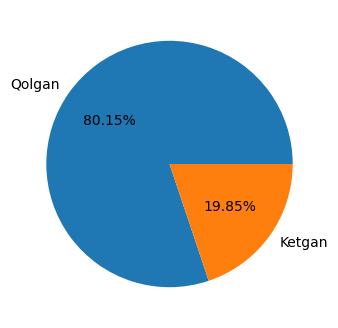

In [11]:
plt.figure(figsize=(4,4))
plt.pie(df.Exited.value_counts()/len(df)*100, labels=["Qolgan","Ketgan"], autopct="%1.2f%%")
plt.show()

#### Bazi ustunlar tahlili

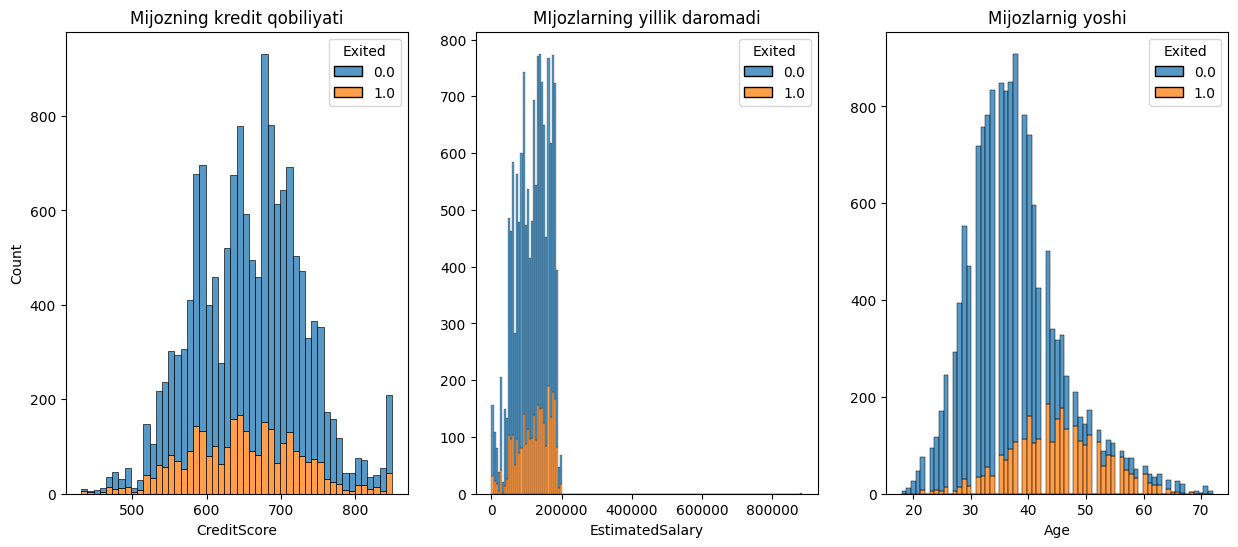

In [12]:
fig, ax = plt.subplots(1,3, figsize=(15,6))

sns.histplot(data=df, x="CreditScore", hue="Exited", multiple="stack", ax=ax[0])
ax[0].set_title("Mijozning kredit qobiliyati")

sns.histplot(data=df, x="EstimatedSalary", hue="Exited", multiple="stack", ax=ax[1])
ax[1].set_title("MIjozlarning yillik daromadi")
ax[1].set_ylabel("")

sns.histplot(data=df, x="Age", hue="Exited", multiple="stack", ax=ax[2])
ax[2].set_title("Mijozlarnig yoshi")
ax[2].set_ylabel("")

plt.show()

#### Korrelatsiya

In [13]:
df.corrwith(df["Exited"], numeric_only=True).abs().sort_values(ascending=False)

Exited             1.000000
Age                0.449425
NumOfProducts      0.312812
IsActiveMember     0.188748
Balance            0.160062
CreditScore        0.052375
EstimatedSalary    0.035193
Tenure             0.032897
HasCrCard          0.010670
CustomerId         0.004122
dtype: float64

# ML

## MLga tayyorgarlik

In [14]:
df = df.drop(["CustomerId", "Surname"], axis=1)
df.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,
1637,711.0,France,Male,31.0,7.0,154586.92,1.0,1.0,0.0,131625.14,0.0


In [15]:
df["Geography"].value_counts()

Geography
France     9040
Spain      3280
Germany    2680
Name: count, dtype: int64

In [16]:
replaceable = {"Male":1, "Female":0}
replaceable2 = {"France":0, "Spain":1, "Germany":2}
df["Gender"] = df["Gender"].map(replaceable)
df["Geography"] = df["Geography"].map(replaceable2)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,
0,567.0,0,1,33.0,9.0,0.0,2.0,1.0,0.0,156792.89,0.0
1,628.0,0,0,38.0,3.0,0.0,1.0,1.0,1.0,51987.99,1.0
2,635.0,0,0,29.0,3.0,0.0,2.0,1.0,1.0,113079.19,0.0
3,681.0,0,1,28.0,6.0,0.0,2.0,1.0,0.0,14081.64,0.0
4,587.0,0,0,27.0,5.0,0.0,2.0,1.0,0.0,158958.90,0.0


In [17]:
# Malumotlarni Scaling qilamiz
scaler = StandardScaler()

num_cols = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,
0,-1.250157,0,1,-0.578313,1.428376,-0.709168,2.0,1.0,0.0,0.865414,0.0
1,-0.410819,0,0,0.035590,-0.724234,-0.709168,1.0,1.0,1.0,-1.410679,1.0
2,-0.314501,0,0,-1.069436,-0.724234,-0.709168,2.0,1.0,1.0,-0.083935,0.0
3,0.318442,0,1,-1.192216,0.352071,-0.709168,2.0,1.0,0.0,-2.233908,0.0
4,-0.974964,0,0,-1.314997,-0.006697,-0.709168,2.0,1.0,0.0,0.912455,0.0


In [18]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [19]:
# train / test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
print(X_train.shape)
print(X_test.shape)

(12000, 10)
(3000, 10)


In [21]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,
9839,-1.745504,2,1,2.122860,-0.724234,1.357333,1.0,0.0,1.0,0.525443
9680,-0.617213,2,1,-0.455532,-0.006697,1.841939,2.0,1.0,1.0,-1.141657
7093,-0.025549,2,1,1.263396,-0.006697,1.042365,1.0,1.0,1.0,1.382415
11293,-0.837368,1,0,-0.332752,-0.724234,-0.709168,2.0,1.0,0.0,1.022347
820,2.643821,0,0,0.158371,-1.083002,-0.709168,2.0,1.0,1.0,0.319646
...,...,...,...,...,...,...,...,...,...,...
5191,0.662433,0,0,-0.209971,1.428376,-0.709168,2.0,0.0,0.0,-0.287047
13418,-0.906166,0,0,2.368422,-0.724234,-0.709168,1.0,1.0,0.0,-1.172727
5390,1.322896,2,1,1.754519,-0.006697,1.340782,1.0,1.0,0.0,-0.566085


## Random Forest

Classification Report:

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94      2424
         1.0       0.76      0.65      0.70       576

    accuracy                           0.89      3000
   macro avg       0.84      0.80      0.82      3000
weighted avg       0.89      0.89      0.89      3000

Accurcy: 89.4%


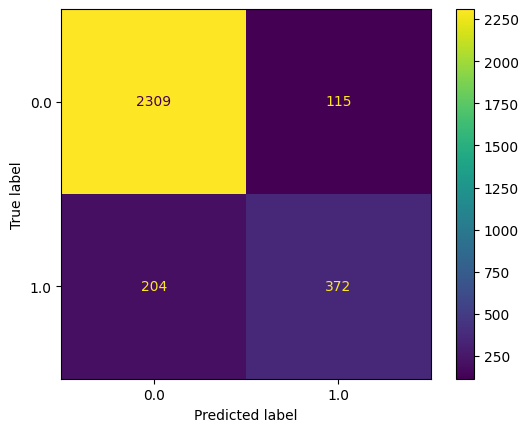

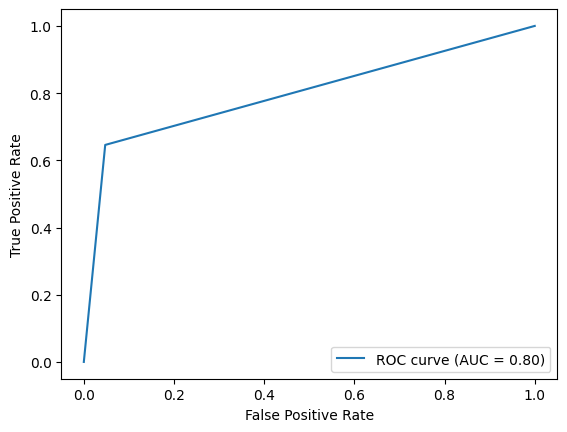

In [22]:
# model
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

# tekshirish
y_pred = RF_model.predict(X_test)
print(f"Classification Report:\n\n{metrics.classification_report(y_test, y_pred)}")
print(f"Accurcy: {metrics.accuracy_score(y_test, y_pred)*100:.1f}%")

# confusion metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print("\n")

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="ROC curve")
display.plot()
plt.show()

## XGBoost

Classification Report:

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      2424
         1.0       0.71      0.66      0.69       576

    accuracy                           0.88      3000
   macro avg       0.82      0.80      0.81      3000
weighted avg       0.88      0.88      0.88      3000

Accurcy: 88.4%


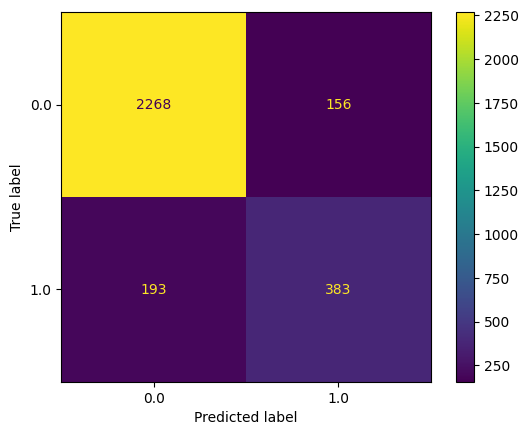

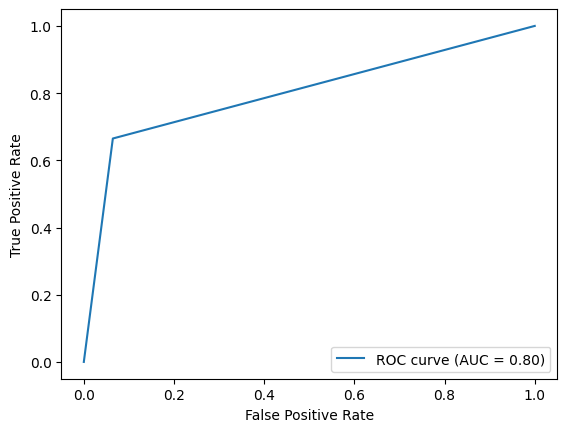

In [23]:
# model
XGBoost = XGBClassifier()
XGBoost.fit(X_train, y_train)

# tekshirish
y_pred = XGBoost.predict(X_test)
print(f"Classification Report:\n\n{metrics.classification_report(y_test, y_pred)}")
print(f"Accurcy: {metrics.accuracy_score(y_test, y_pred)*100:.1f}%")

# confusion metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print("\n")

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="ROC curve")
display.plot()
plt.show()

## Decision Tree

Classification Report:

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      2424
         1.0       0.72      0.69      0.71       576

    accuracy                           0.89      3000
   macro avg       0.83      0.82      0.82      3000
weighted avg       0.89      0.89      0.89      3000

Accurcy: 89.1


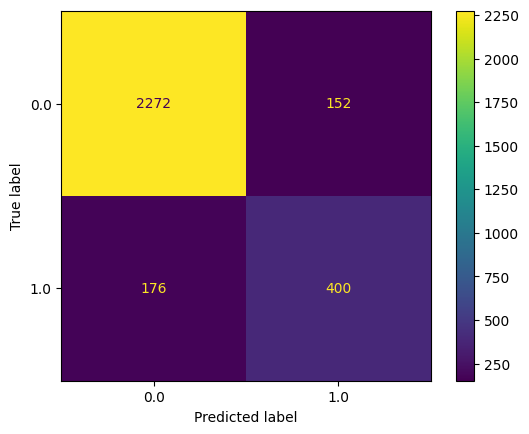

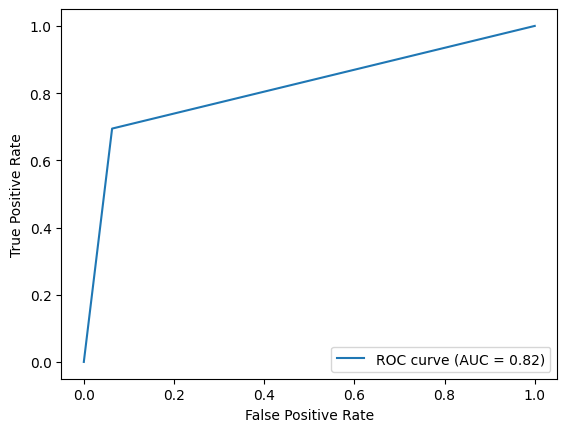

In [24]:
# model
decision_tree = DecisionTreeClassifier(max_depth=6)
decision_tree.fit(X_train, y_train)

# tekshirish
y_pred = decision_tree.predict(X_test)
print(f"Classification Report:\n\n{metrics.classification_report(y_test, y_pred)}")
print(f"Accurcy: {metrics.accuracy_score(y_test, y_pred)*100:.1f}")

# confusion metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print("\n")

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="ROC curve")
display.plot()
plt.show()

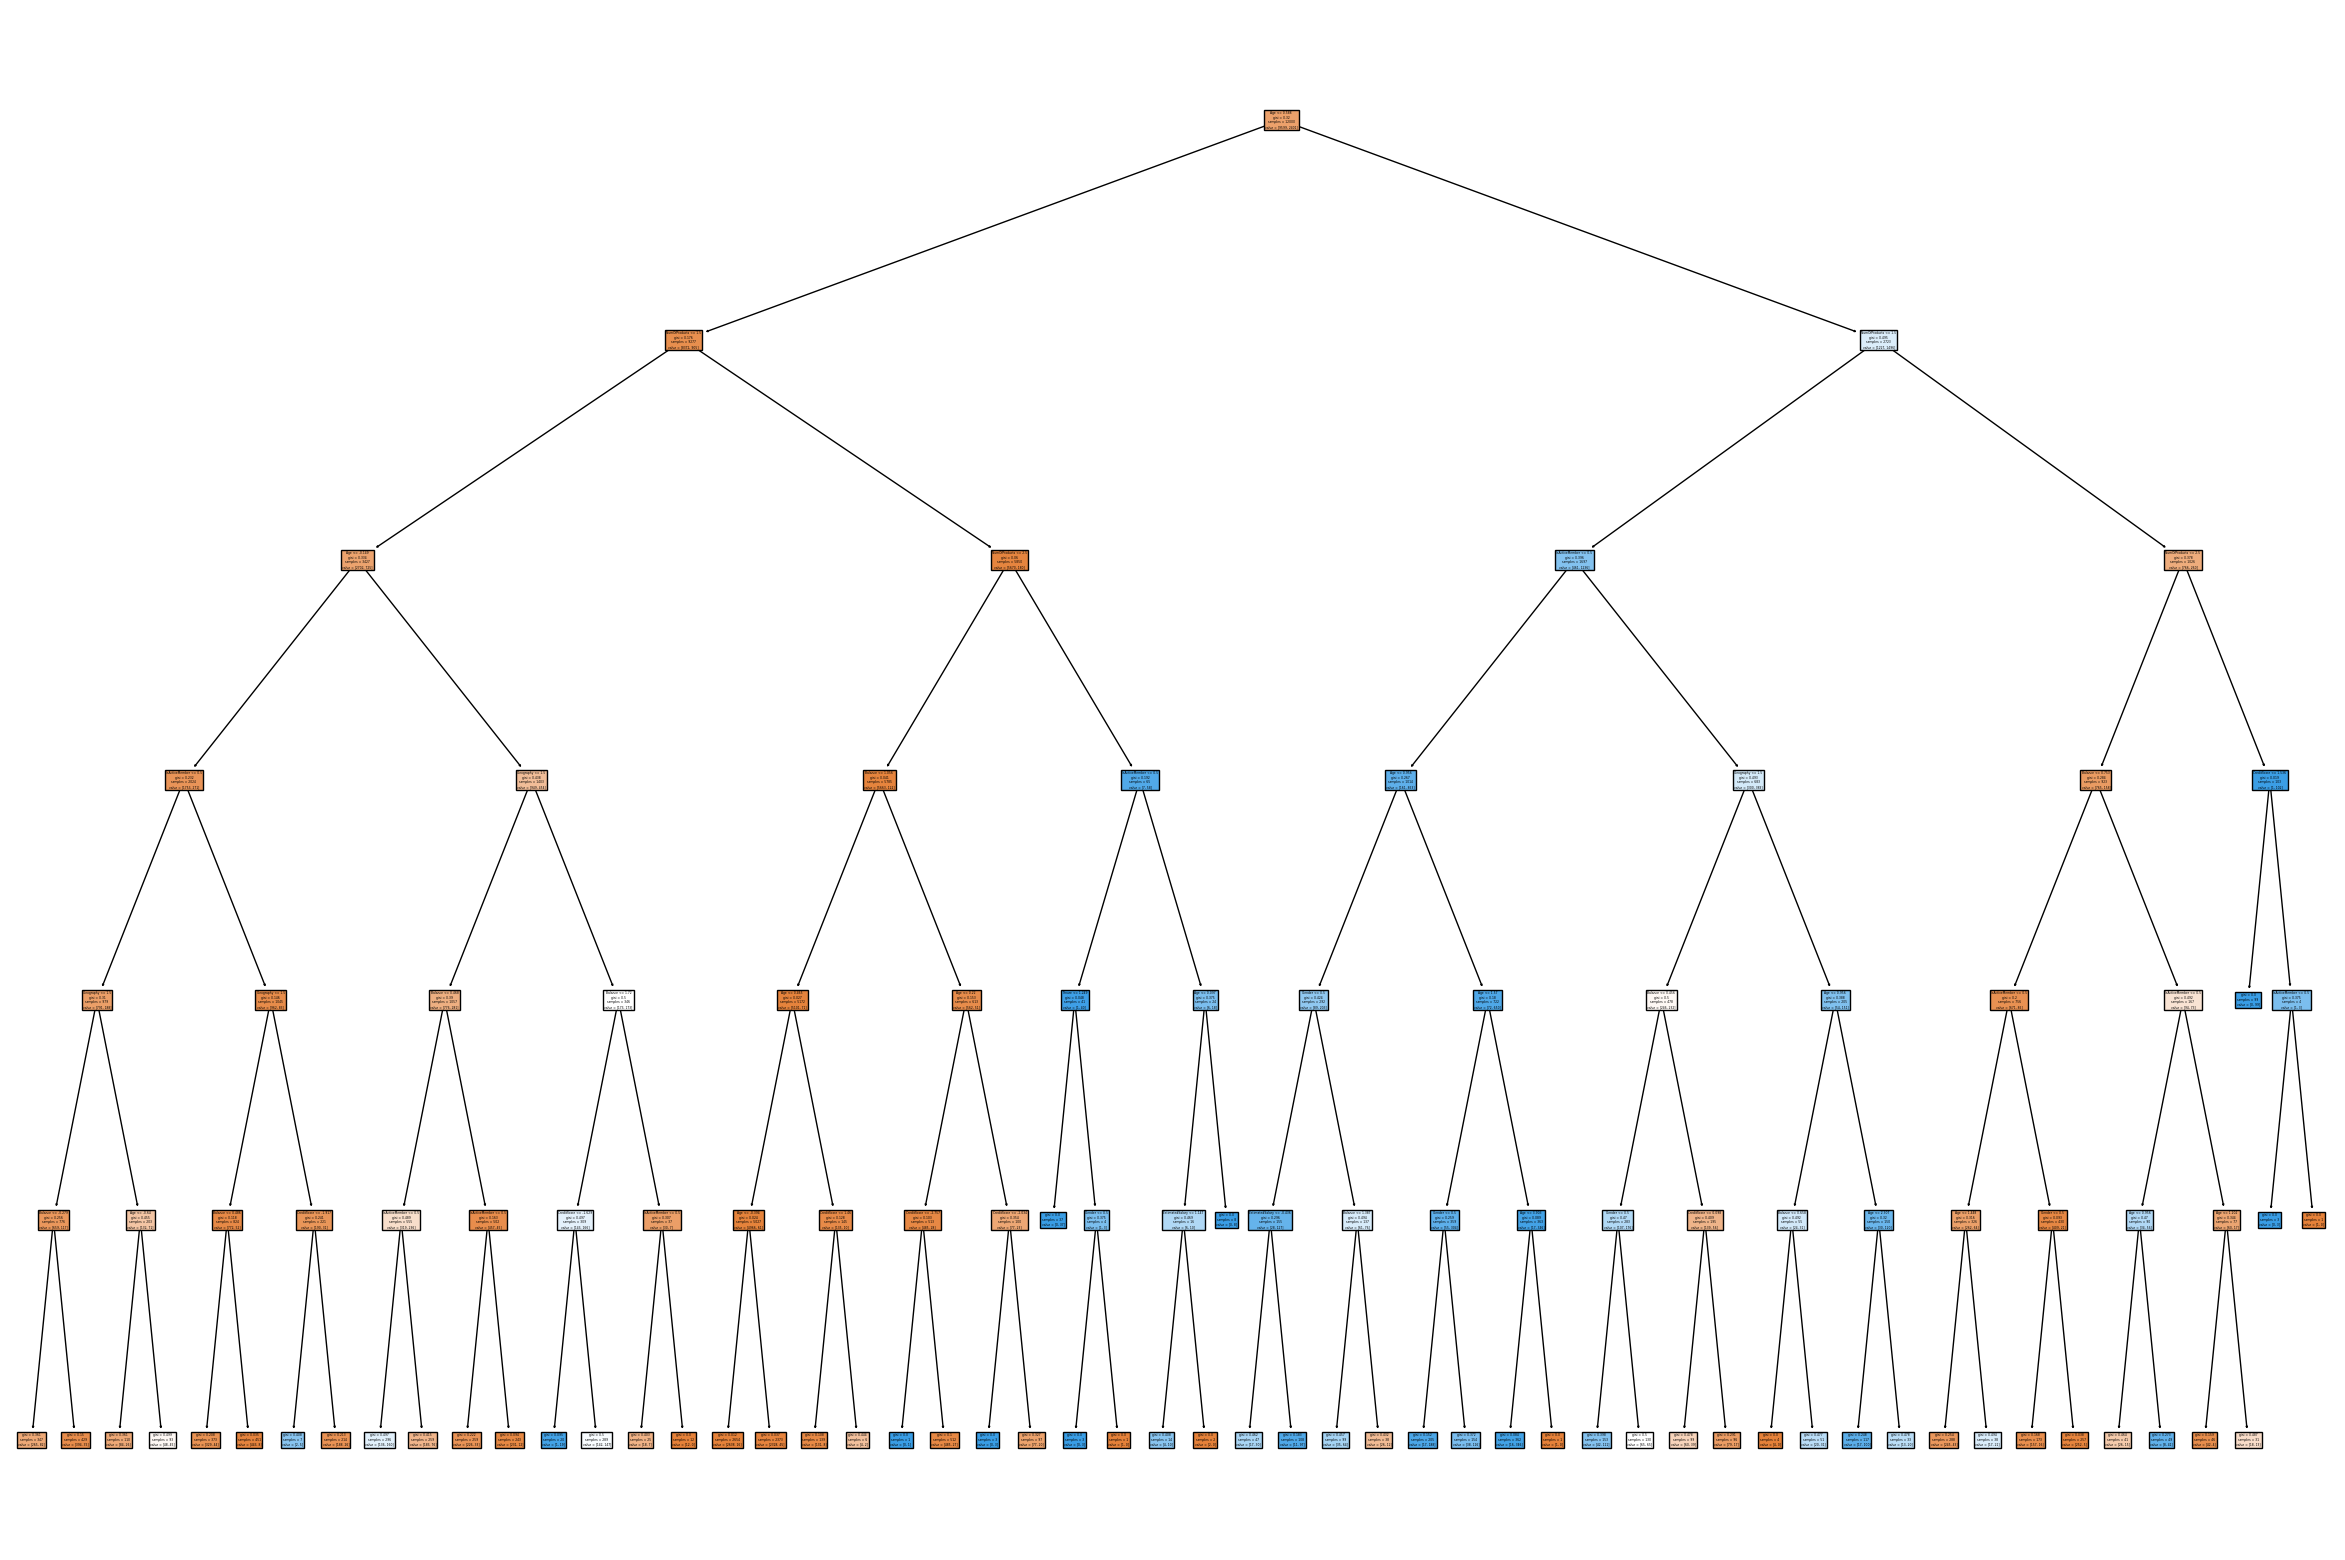

In [25]:
plt.figure(figsize=(30,20))
plot_tree(decision_tree, feature_names=X.columns, filled=True)
plt.show()

## Logistic Regression

Classification Report:

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.93      2424
         1.0       0.75      0.51      0.61       576

    accuracy                           0.87      3000
   macro avg       0.82      0.74      0.77      3000
weighted avg       0.87      0.87      0.86      3000

Accurcy: 87.4%


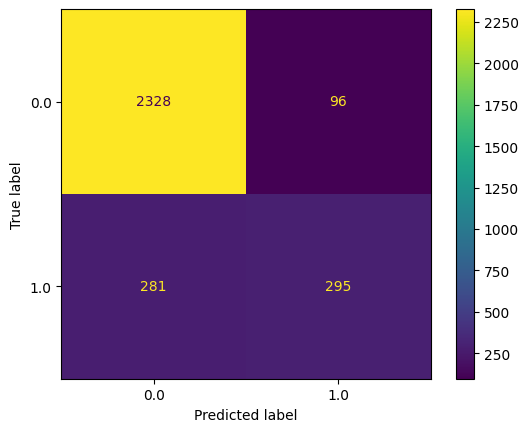

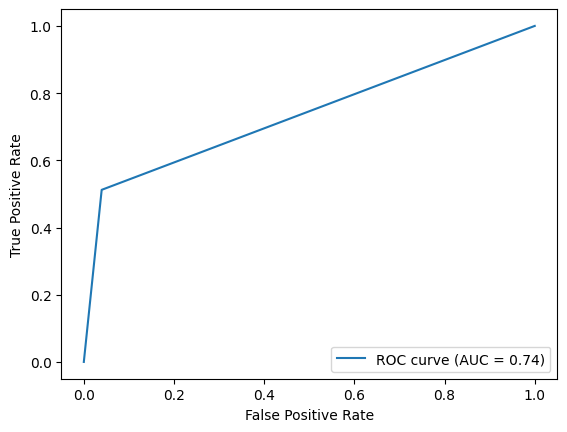

In [26]:
# model
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# tekshirish
y_pred = LR_model.predict(X_test)
print(f"Classification Report:\n\n{metrics.classification_report(y_test, y_pred)}")
print(f"Accurcy: {metrics.accuracy_score(y_test, y_pred)*100:.1f}%")

# confusion metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print("\n")

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="ROC curve")
display.plot()
plt.show()

## SVM

Classification Report:

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      2424
         1.0       0.81      0.61      0.70       576

    accuracy                           0.90      3000
   macro avg       0.86      0.79      0.82      3000
weighted avg       0.89      0.90      0.89      3000

Accurcy: 89.7%


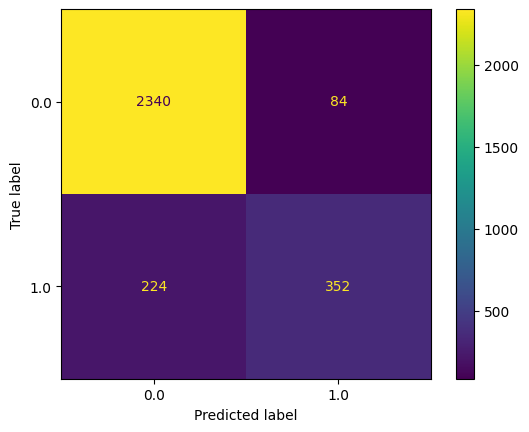

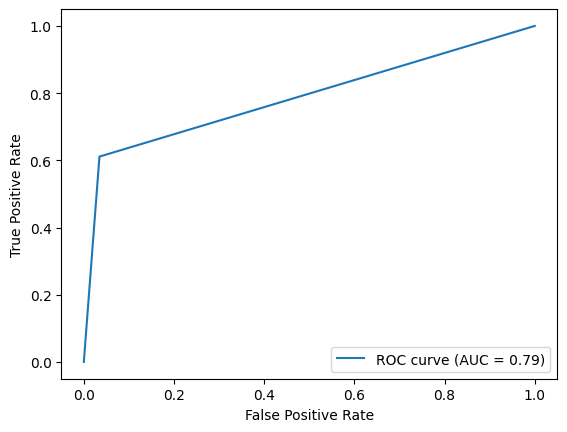

In [27]:
# model
svm = SVC()
svm.fit(X_train, y_train)

# tekshirish
y_pred = svm.predict(X_test)
print(f"Classification Report:\n\n{metrics.classification_report(y_test, y_pred)}")
print(f"Accurcy: {metrics.accuracy_score(y_test, y_pred)*100:.1f}%")

# confusion metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print("\n")

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="ROC curve")
display.plot()
plt.show()

In [28]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,
9839,-1.745504,2,1,2.122860,-0.724234,1.357333,1.0,0.0,1.0,0.525443
9680,-0.617213,2,1,-0.455532,-0.006697,1.841939,2.0,1.0,1.0,-1.141657
7093,-0.025549,2,1,1.263396,-0.006697,1.042365,1.0,1.0,1.0,1.382415
11293,-0.837368,1,0,-0.332752,-0.724234,-0.709168,2.0,1.0,0.0,1.022347
820,2.643821,0,0,0.158371,-1.083002,-0.709168,2.0,1.0,1.0,0.319646
...,...,...,...,...,...,...,...,...,...,...
5191,0.662433,0,0,-0.209971,1.428376,-0.709168,2.0,0.0,0.0,-0.287047
13418,-0.906166,0,0,2.368422,-0.724234,-0.709168,1.0,1.0,0.0,-1.172727
5390,1.322896,2,1,1.754519,-0.006697,1.340782,1.0,1.0,0.0,-0.566085


## CatBoostClassifier

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.9207423	best: 0.9207423 (0)	total: 292ms	remaining: 4m 51s
100:	test: 0.9375895	best: 0.9376673 (98)	total: 2.92s	remaining: 26s
bestTest = 0.9378480911
bestIteration = 120
Shrink model to first 121 iterations.
Classification Report:

              precision    recall  f1-score   support

         0.0       0.97      0.85      0.91      2424
         1.0       0.58      0.88      0.70       576

    accuracy                           0.86      3000
   macro avg       0.78      0.86      0.80      3000
weighted avg       0.89      0.86      0.87      3000

Accurcy: 85.6%


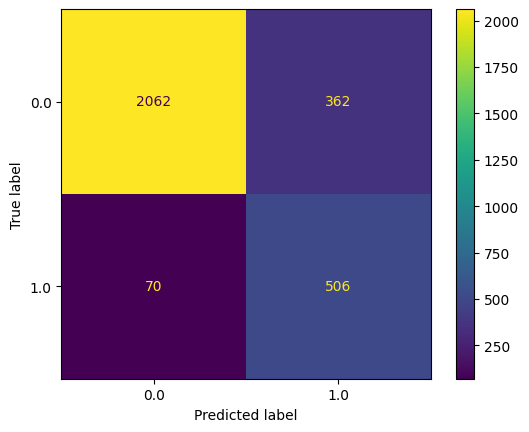

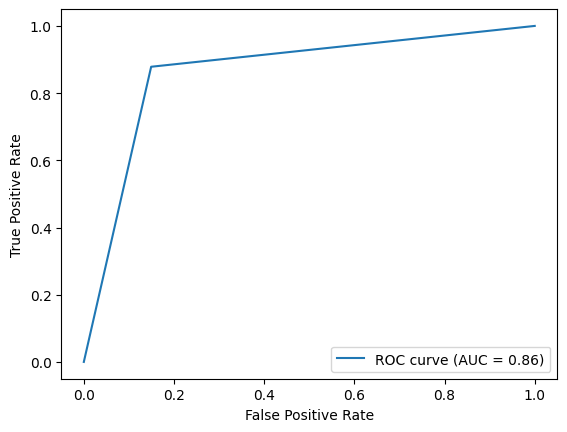

In [29]:
# model
# barcha kategorik ustunlarni aniqlash
categorical_columns = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
model = CatBoostClassifier(
    iterations=1000,              
    learning_rate=0.05,           
    depth=6,                     
    l2_leaf_reg=3,                
    auto_class_weights='Balanced',   
    cat_features=categorical_columns,   
    eval_metric='AUC',            
    early_stopping_rounds=50,     
    task_type='GPU',              
    verbose=100,                  
    random_seed=42)   
# Modelni o‘qitish
model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),    
    use_best_model=True         
)

# tekshirish
y_pred = model.predict(X_test)
print(f"Classification Report:\n\n{metrics.classification_report(y_test, y_pred)}")
print(f"Accurcy: {metrics.accuracy_score(y_test, y_pred)*100:.1f}%")

# confusion metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print("\n")

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="ROC curve")
display.plot()
plt.show()

#  **Datasetadgi malumotlarimizda `Ketan` va `Qolgan` mijozlar orasidagi farq katta bo'lgani uchun asosan `ROC curve` natijasiga qaraymiz.**
#  Bizda hozirda eng katta ROC curve natijasini `CatBoostClassifier` classifikatori berdi, shu uchun berilgan datasetni shu model bilan bashorat qilamiz

In [30]:
df_test.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,,,
15000,15732563.0,Hs?,707.0,Germany,Male,21.0,4.0,114513.66,2.0,1.0,0.0,176692.87
15001,15727041.0,Ma,678.0,Germany,Male,33.0,5.0,142510.50,1.0,0.0,0.0,52820.13
15002,15753679.0,K?,636.0,Spain,Male,45.0,9.0,0.00,2.0,1.0,1.0,125062.02
15003,15581554.0,H?,697.0,Spain,Male,46.0,8.0,0.00,2.0,1.0,0.0,131647.41
15004,15773723.0,Bellucci,553.0,Spain,Male,31.0,2.0,0.00,2.0,1.0,0.0,58814.41


In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15000 to 24999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  float64
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  float64
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  float64
 6   Tenure           10000 non-null  float64
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  float64
 9   HasCrCard        10000 non-null  float64
 10  IsActiveMember   10000 non-null  float64
 11  EstimatedSalary  10000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 1015.6+ KB


In [32]:
df_test = df_test.drop(["CustomerId", "Surname"], axis=1)
df_test.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,
18338,678.0,Germany,Male,42.0,6.0,118870.92,1.0,1.0,1.0,67364.42


In [33]:
replaceable = {"Male":1, "Female":0}
replaceable2 = {"France":0, "Spain":1, "Germany":2}
df_test["Gender"] = df_test["Gender"].map(replaceable)
df_test["Geography"] = df_test["Geography"].map(replaceable2)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,
0,-1.250157,0,1,-0.578313,1.428376,-0.709168,2.0,1.0,0.0,0.865414,0.0
1,-0.410819,0,0,0.035590,-0.724234,-0.709168,1.0,1.0,1.0,-1.410679,1.0
2,-0.314501,0,0,-1.069436,-0.724234,-0.709168,2.0,1.0,1.0,-0.083935,0.0
3,0.318442,0,1,-1.192216,0.352071,-0.709168,2.0,1.0,0.0,-2.233908,0.0
4,-0.974964,0,0,-1.314997,-0.006697,-0.709168,2.0,1.0,0.0,0.912455,0.0


In [34]:
 # Malumotlarni Scaling qilamiz
scaler = StandardScaler()

num_cols = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]
df_test[num_cols] = scaler.fit_transform(df_test[num_cols])
df_test.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,
15000,0.668355,2,1,-2.057021,-0.372987,1.213911,2.0,1.0,0.0,1.285355
15001,0.268016,2,1,-0.583915,-0.015480,1.684777,1.0,0.0,0.0,-1.405527
15002,-0.311785,1,1,0.889192,1.414549,-0.712044,2.0,1.0,1.0,0.163780
15003,0.530307,1,1,1.011950,1.057042,-0.712044,2.0,1.0,0.0,0.306834
15004,-1.457584,1,1,-0.829433,-1.088002,-0.712044,2.0,1.0,0.0,-1.275313


In [35]:
df_test.shape

(10000, 10)

In [36]:
X = df_test.copy()

In [37]:
y_pred = model.predict(X)
y_pred_proba = model.predict_proba(X)[:, 1]

In [38]:
y_pred_proba.shape

(10000,)

In [39]:
predicted = pd.DataFrame({'id':df_test.index, 
                         "Exited":y_pred_proba})
predicted.head()

,id,Exited
0,15000,0.080143
1,15001,0.508368
2,15002,0.156265
3,15003,0.339748
4,15004,0.047372


In [40]:
# Submission file
predicted.to_csv("Submission_me.csv")